<a href="https://colab.research.google.com/github/HeleneMaxcici/Autoencoder-Study/blob/master/4_layers_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study of a 4 Layers AutoEncoder for Step Functions

### Architecture

- **Input:** $n_{in} = 128$, input vector $\mathbf x$ 
- **Layer 1:**  $n_{h1}$ neurons, hidden vector $\mathbf a^{[1]}$
- **Layer 2:** $n_{h2} = 2$ neuron, hidden vector $\mathbf z$
- **Layer 3:** $n_{h3} = n_{h1}$ neurons, hidden vector $\mathbf a^{[3]}$
- **Layer 4:** $n_{out} = 128$, output vector $\mathbf y$

### Equations

\begin{align}
\mathbf u^{[1]} & = W^{[1]} \mathbf x \\
\mathbf a^{[1]} & = g_1(\mathbf u^{[1]}) \\
\mathbf u^{[2]} & = W^{[2]} \mathbf a^{[1]} \\
\mathbf z & = g_2(\mathbf u^{[2]}) \\
\mathbf u^{[3]} & = W^{[3]} \mathbf z \\
\mathbf a^{[3]} & = g_3(\mathbf u^{[3]})\\
\mathbf u^{[4]} & = W^{[4]} \mathbf a^{[3]} \\
\mathbf y & = g_4(\mathbf u^{[4]}) = \max(0, W^{[4]} \mathbf a^{[3]}) \\
\end{align}

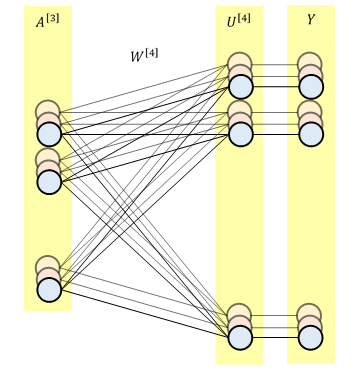

## How many neurons do we need in the layer 3?

Let's start with the decoder from the things we know, i.e. what the output will be and that the output activations are only ReLU.

\begin{equation}
\mathbf y = \max(0, W^{[4]} \mathbf a^{[3]})
\end{equation}

We will consider all 129 step functions. Thus, we'll have:

- $\underset{n\times (n+1)}{X}$ : each column is a step function
- $\underset{k\times (n+1)}{A^{[3]}}$ : each column is the response of the network at the 3rd layer to a step function i.e. to a different position.
- $\underset{n\times (n+1)}{U^{[4]}} = \underset{n\times k}{W^{[4]}} \underset{k\times (n+1)} {A^{[3]}}$  
- $\underset{n\times (n+1)}{Y}$ 

Let's suppose $n_{h3} = k$. Whatever were the weights and activations for the previous layers, we know that we need $U^{[4]}$ to have the following form.

\begin{equation}
U^{[4]} =
\begin{bmatrix}
    1 & u_{1,2}^{[4]} & u_{1,3}^{[4]} & u_{1,4}^{[4]} & \dots  & u_{1,n+1}^{[4]} \\
    1 & 1 & u_{2,3}^{[4]} & u_{2,4}^{[4]} & \dots  & u_{2,n+1}^{[4]} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & 1 & 1 & \dots  & u_{n,n+1}^{[4]}
\end{bmatrix}
\end{equation}

Where $u_{i,j}^{[4]} \leq 0$ $\forall i,j$ with $i=1,...,n$ and $j=i+1,...,n+1$

#### Rank of $U^{[4]}$
Since the last column can be a zero vector, we will study the linearly independence of the rest of the columns.

Let $\mathbf u_j^{[4]} $ be the column $j$ of the matrix $U^{[4]}$. Let's find a set of non-zero real scalars $\alpha_j$, $j=1,...,n$ such that

\begin{equation}
\sum_{j=1}^{j=n} \alpha_j \mathbf u_j ^{[4]} = \mathbf 0
\end{equation}

All entries of the combination must be equal to $0$. 

- For $i=n$
\begin{align}
& \sum_{j=1}^{j=n} \alpha_j u_{n,j} ^{[4]} = \sum_{j=1}^{j=n} \alpha_j = 0  \\
\end{align}

- For $i=n-1$
\begin{align}
& \sum_{j=1}^{j=n} \alpha_j u_{n-1,j} ^{[4]}  = 0 \\
& \sum_{j=1}^{j=n-1} \alpha_j +  \alpha_n u_{n-1,n} ^{[4]}  = 0 \\
& -\alpha_n + \alpha_n u_{n-1,n} ^{[4]}  = \alpha_n (u_{n-1,n} ^{[4]} -1) = 0 
\end{align}

Since $u_{n-1,n} ^{[4]} \leq 0$ then $\alpha_n = 0$. Continuing in a similar manner, we will obtain $\alpha_j = 0$ $\forall j = 1,...,n$.

Thus, the set of vectors $\mathbf u_j^{[4]} $ for $j=1,...,n$ are linearly independent and the rank of the matrix $U^{[4]}$ is equal to $n$.

### Number of required neurons
In order for the autoencoder to be able to reconstruct these step functions, the value of $k$ should be such that $rank(W^{[4]}A^{[3]}) = rank(U^{[4]})=n $. 

We know that $rank(W^{[4]}A^{[3]}) \leq \min (rank(\underset{n\times k}{W^{[4]}}), rank(\underset{k\times (n+1)}{A^{[3]}}))$. Thus, we need $k=n$.

### Can $rank(A^{[3]}) = n$?

The weights in $W^{[4]}$ are learnt, thus we will suppose that it is possible for this matrix to have a rank equal to $n$.

Let's suppose we are only interested in the position. Hence, the latent space is a scalar $z$.

\begin{equation}
A^{[3]} =
\begin{bmatrix}
    \vdots & \vdots  & \dots & \vdots \\
    a^{[3](1)} & a^{[3](2)}  & \dots & a^{[3](n+1)}  \\
    \vdots & \vdots & \dots & \vdots 
\end{bmatrix}
= 
\begin{bmatrix}
    \vdots & \vdots  & \dots & \vdots \\
    g_3(z^{(1)} W^{[3]}) & g_3(z^{(2)} W^{[3]})  & \dots & g_3(z^{(n+1)} W^{[3]})  \\
    \vdots & \vdots & \dots & \vdots 
\end{bmatrix}
\end{equation}

With $z^{(i)}$, $i=1,...,n+1$ is a scalar representing the latent space for a step function of position $i$. 

It is clear for us now that a nonlinearity $g_3$ at that layer is crucial. Otherwise $rank(A^{[3]}) = 1$.  

The next question will be, can a nonlinearity $g_3$ make $rank(A^{[3]}) = n$? And which one?

### $g_3$ = ReLU

- **Without a bias**

  \begin{equation}
  g_3(z^{(i)} W^{[3]}) =
    \begin{cases}
      |z^{(i)}|g_3(W^{[3]}) & \text{if } z^{(i)}\geq 0\\
      |z^{(i)}|g_3(-W^{[3]}) & \text{if } z^{(i)}< 0\\
    \end{cases}
  \end{equation}
  
  Without a bias the rank of $A^{[3]}$ will be equal to $2$.

- **With a bias**

  \begin{equation}
  g_3(z^{(i)} W^{[3]} + b^{[3]})
  \end{equation}
  
  With a bias we can ensure that the rank of $A^{[3]}$ will be equal to $n$. The reason for that is that the vector $b^{[3]}$ can be in such a way to zero for each position $i$ a number of neurons equal to $i$ (we'll have a triangular matrix $A^{[3]}$).


### Plan

1. We will only consider location information i.e. one hidden representation. We will keep the encoder with one layer whose weights are fixed as in the previous notbook to ensure a linear hidden representation. We will add one layer before the output layer with $n=128$ neurons. And we will try to reproduce all the step functions correctly.

## 2 Layers decoder

First thing we notice is a difficulty in learning. We think it is caused by the learning rate. For that we will do AdaDelta optimization.

With AdaDelta we could achieve better results but not the best ones. The learning was still unstable. For that we helped the network learn by decreasing the number of parameters. We fixed the vector $W2$ as a constant vector and its value $w$ is the one to be learnt. We fixed the vector $b2$ as a linearly increasing vector with its a "slope" $b$ and a constant $q$ to be learnt. The initialisation of these parameters is important. We should choose them in a way that preservs the order. Otherwise, the network will fall into a local minima which it can't surpass.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# Matrix of step functions
X = torch.zeros(128, 129)
r = torch.randperm(128)
X[:, r] = torch.tril(torch.ones(128, 128))

In [34]:
class AutoEncoder():

  def __init__(self, n_in, n_h1, n_h2, n_out):
    
    # Weight Initialization 
    # Layer 1
    self.W1 = -torch.ones(n_h1, n_in, dtype= torch.float)

    self.b1 = 128*torch.ones(n_h1, 1, dtype = torch.float)

    # Layer 2
    self.W2 = torch.ones(n_h2, n_h1, dtype= torch.float)
    
    self.w = -torch.ones(1, 1, dtype= torch.float)*0.001
    self.w.requires_grad = True

    self.b = torch.ones(1, 1, dtype= torch.float)*0.001
    self.b.requires_grad = True

    self.q = torch.ones(1, 1, dtype= torch.float)*0.001
    self.q.requires_grad = True

    self.b2 = torch.unsqueeze(torch.arange(0,128, dtype= torch.float),1)
    #self.b2 = torch.rand(n_h2, 1, dtype= torch.float)*0.05 + 0.001
    #self.b2.requires_grad = True

    # Layer 3
    self.W3 = torch.rand(n_out, n_h2, dtype= torch.float)*0.5 
    self.W3.requires_grad = True

    self.SW2 = 0
    self.Sb2 = 0
    self.SW3 = 0
    self.Sb = 0
    self.Sq = 0

  def forward(self, X):
      u1 = self.W1 @ X + self.b1
      self.z1 = u1

      u2 = self.w *self.W2 @ self.z1 + (self.b2 * self.b + self.q)
      self.z2 = F.leaky_relu(u2)

      u3 = self.W3 @ self.z2 
      self.y = torch.clamp(u3,0)    

      return self.y

  def optim_step(self, alpha = 1e-3, gamma = 0.99):
    with torch.no_grad():

      #self.SW2 = gamma * self.SW2 + (1 - gamma) * (self.W2.grad)**2
      #self.W2 -= alpha * self.W2.grad  / torch.sqrt(self.SW2 + 1e-8)

      self.w -= alpha * self.w.grad

      self.Sb = gamma * self.Sb + (1 - gamma) * (self.b.grad)**2
      self.b -= alpha * self.b.grad / (self.Sb + 1e-6)

      self.Sq = gamma * self.Sq + (1 - gamma) * (self.q.grad)**2
      self.q -= alpha * self.q.grad / (self.Sq + 1e-6)

      #self.Sb2 = gamma * self.Sb2 + (1 - gamma) * (self.b2.grad)**2
      #self.b2 -= alpha * self.b2.grad / (self.Sb2 + 1e-6)

      self.SW3 = gamma * self.SW3 + (1 - gamma) * (self.W3.grad)**2
      self.W3 -= alpha * self.W3.grad / (self.SW3 + 1e-6) 

    
    self.w.grad.zero_()
    self.b.grad.zero_()
    self.q.grad.zero_()
    #self.b2.grad.zero_()
    self.W3.grad.zero_()

In [35]:
# Model Parameters
n_in = 128
n_h1 = 1
n_h2 =128
n_out = 128

In [36]:
ae = AutoEncoder(n_in, n_h1, n_h2, n_out)

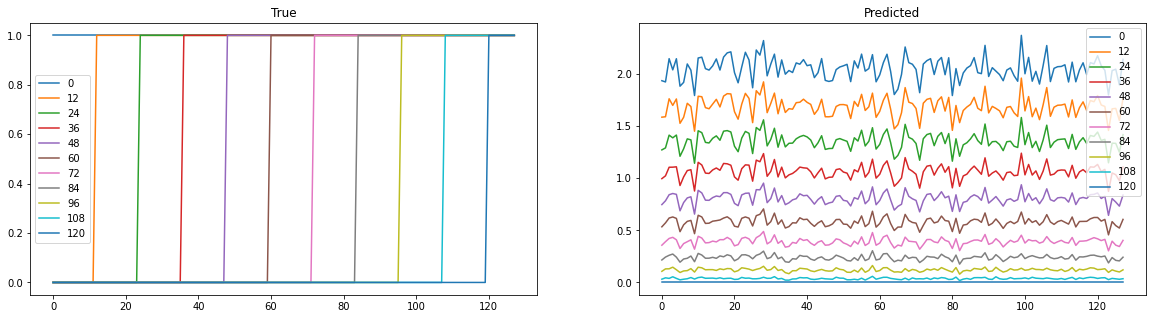

In [37]:
fig = plt.figure(figsize = (20,5))

axes = fig.subplots(1,2)

for n in np.arange(0, 128, 12):
  axes[0].plot(X[:,r[n]], label = n)
  axes[1].plot(ae.forward(X[:,r[n]]).detach().numpy(), label = n)

axes[0].set_title("True")
axes[0].legend()
axes[1].set_title("Predicted")
axes[1].legend()

Text(0.5, 1.0, 'W3')

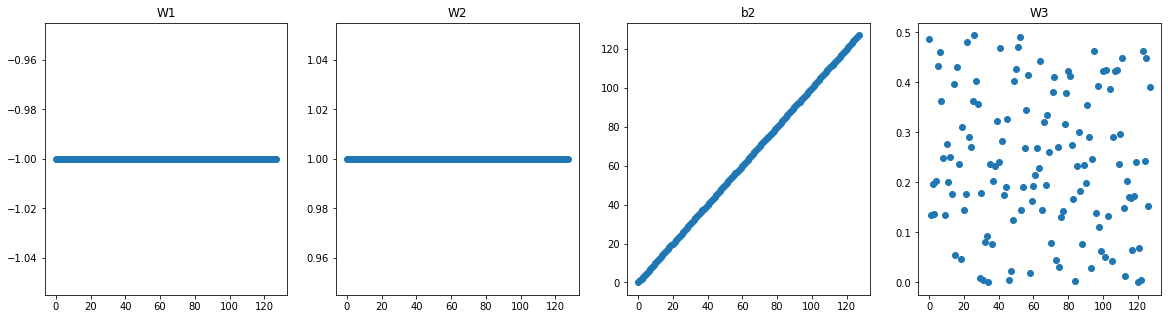

In [38]:
# Analysing the weights

plt.figure(figsize= (20,5))

plt.subplot(141)
plt.scatter(np.arange(128), ae.W1.detach().numpy()[0])
plt.title("W1")

plt.subplot(142)
plt.scatter(np.arange(128), ae.W2.detach().numpy())
plt.title("W2")

plt.subplot(143)
plt.scatter(np.arange(128), ae.b2.detach().numpy())
plt.title("b2")

plt.subplot(144)
plt.scatter(np.arange(128), ae.W3[0].detach().numpy())
plt.title("W3")

In [51]:
ae = AutoEncoder(n_in, n_h1, n_h2, n_out)

In [52]:
# Learning Rate 
alpha = 1e-7
# Number of epochs
nb_epochs = 10000000

In [53]:
losses = []

for epoch in range(nb_epochs):
  Y = ae.forward(X)

  loss = nn.MSELoss()(Y, X)  #+0.01*torch.mean(torch.abs(ae.W3)) + 1e-7/(torch.mean(torch.abs(ae.W3))+1e-5)

  if (epoch + 1 )%10000 == 0:
    
    losses.append(loss)

    print(f"epoch {epoch + 1} - loss: {loss.item()} ") 

    #alpha = 0.999 * alpha

  loss.backward()

  ae.optim_step(alpha,0)

epoch 10000 - loss: 0.09397345781326294 
epoch 20000 - loss: 0.08471956104040146 
epoch 30000 - loss: 0.07965606451034546 
epoch 40000 - loss: 0.07458867132663727 
epoch 50000 - loss: 0.06845835596323013 
epoch 60000 - loss: 0.06361192464828491 
epoch 70000 - loss: 0.059143345803022385 
epoch 80000 - loss: 0.055746257305145264 
epoch 90000 - loss: 0.05392053350806236 
epoch 100000 - loss: 0.05201807990670204 
epoch 110000 - loss: 0.050089914351701736 
epoch 120000 - loss: 0.048148635774850845 
epoch 130000 - loss: 0.04625724256038666 
epoch 140000 - loss: 0.04439577832818031 
epoch 150000 - loss: 0.04237048700451851 
epoch 160000 - loss: 0.04052571579813957 
epoch 170000 - loss: 0.03873855620622635 
epoch 180000 - loss: 0.036723218858242035 
epoch 190000 - loss: 0.03491387888789177 
epoch 200000 - loss: 0.033328648656606674 
epoch 210000 - loss: 0.031838297843933105 
epoch 220000 - loss: 0.030437801033258438 
epoch 230000 - loss: 0.02903561107814312 
epoch 240000 - loss: 0.027790023013

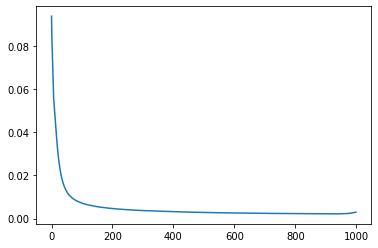

In [54]:
plt.plot(losses)

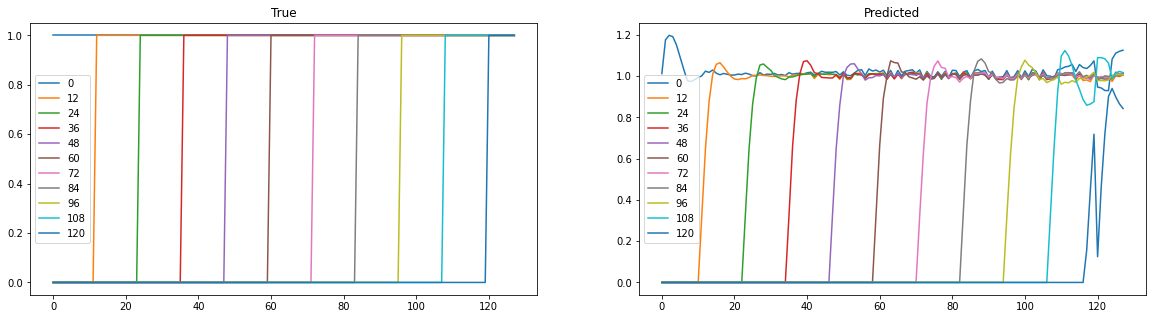

In [55]:
fig = plt.figure(figsize = (20,5))

axes = fig.subplots(1,2)

for n in np.arange(0, 128, 12):
  axes[0].plot(X[:,r[n]], label = n)
  axes[1].plot(ae.forward(X[:,r[n]]).detach().numpy(), label = n)

axes[0].set_title("True")
axes[0].legend()
axes[1].set_title("Predicted")
axes[1].legend()

Text(0.5, 1.0, 'W3')

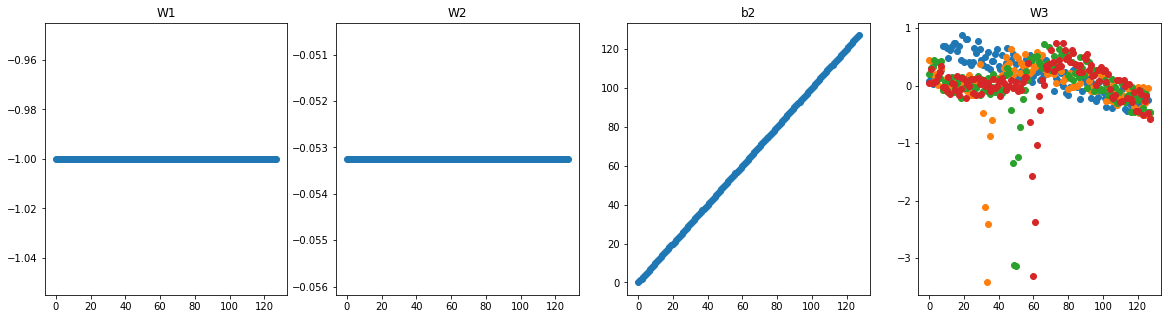

In [56]:
 # Analysing the weights

plt.figure(figsize= (20,5))

plt.subplot(141)
plt.scatter(np.arange(128), ae.W1.detach().numpy()[0])
plt.title("W1")

plt.subplot(142)
plt.scatter(np.arange(128), ae.W2.detach().numpy()*ae.w.detach().numpy())
plt.title("W2")

plt.subplot(143)
plt.scatter(np.arange(128), ae.b2.detach().numpy())
plt.title("b2")

plt.subplot(144)
plt.scatter(np.arange(128), ae.W3[0,:].detach().numpy())
plt.scatter(np.arange(128), ae.W3[50,:].detach().numpy())
plt.scatter(np.arange(128), ae.W3[80,:].detach().numpy())
plt.scatter(np.arange(128), ae.W3[100,:].detach().numpy())
plt.title("W3")